# Evaluate the result of Experiments

The aim of this script is to standardize the evaluation of several experiments.

In [16]:
import pickle
from myLibrary import Experiment
import os
import ipywidgets as widgets
from IPython.display import display

In [17]:
report_directory = os.path.join(os.getcwd(), f'data/reports')

def build_UI():
    # Select Model-------------------------------------------------------------------------------
    global report_widget
    report_list = os.listdir(report_directory)
    report_widget = widgets.Select(
        options=report_list,
        value=report_list[0],
        # rows=10,
        description='Reports:',
        disabled=False
    )
    display(report_widget)

build_UI()

Select(description='Reports:', options=('report_test.pickle', 'Most_basic_PINN.pickle', 'Dataset_Testing.pickl…

In [18]:
filename = report_widget.value
#filename = "Most_basic_LSTM"

# open the file for reading in binary mode
report: Experiment
with open(f'data/reports/{filename}', 'rb') as f:
    # load the object from the file using pickle.load()
    report = pickle.load(f)

In [19]:
report.print_settings()

Experiment: report_test
Stations that provide all files from 2013-2022 in GOM
---------------------------------------
Stations: ['41117']
Years: ['2022']
NaN_Threshold: 0.5
Features: ['ATMP', 'WTMP']
ERA5: True, Stationary Shift: 1, lag: 1, Test-Hours:24

---------------------------------------
Normalized: True

---------------------------------------
Internal Model name: lstm_0
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                11000     
                                                                 
 dense_2 (Dense)             (None, 4)                 204       
                                                                 
Total params: 11,204
Trainable params: 11,204
Non-trainable params: 0
_________________________________________________________________


In [20]:
report.print_metrics()

One-Shot-Forecasting:
MAE: 0.1402010140990439 	MSE: 0.02565147800465928

Recurrent-Forecasting:
MAE: 20.86414866670229 	MSE: 570.4864354274642


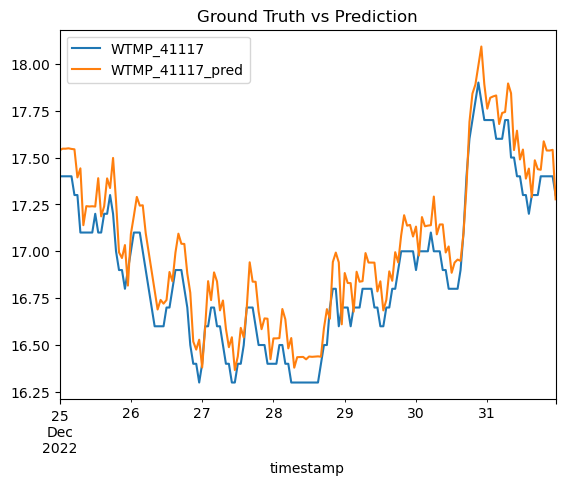

In [21]:
report.print_one_shot_WTMP()

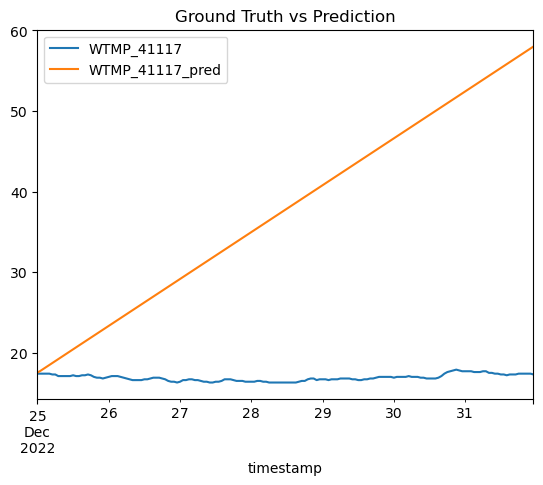

In [22]:
report.print_recursive_WTMP()

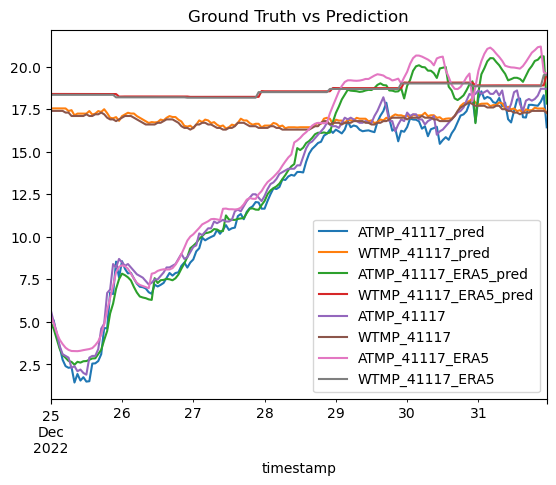

In [23]:
report.print_one_shot_forecast()

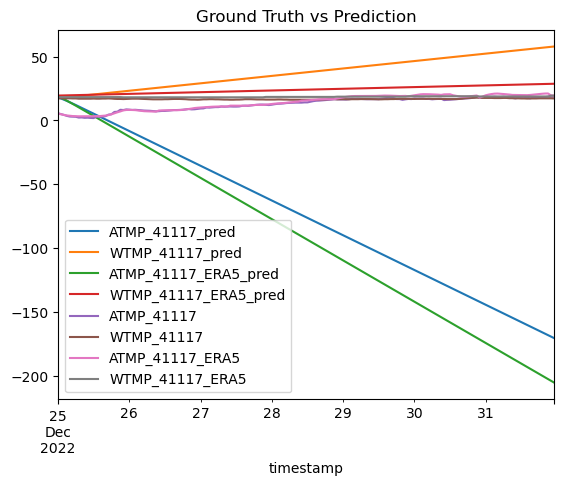

In [24]:
report.print_recursive_forecast()